<h1>Realizar un análisis exploratorio de los datos para identificar 
relaciones entre variables, valores atípicos, tendencias, etc</h1>

In [6]:



# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression


# Configuración para gráficos
%matplotlib inline
sns.set(style="whitegrid")

# Cargar datos (verifica que la ruta sea correcta en tu sistema)
df = pd.read_csvdf = pd.read_csv('C:/Users/Windows 10/Downloads/heart_cleveland_upload.csv')

# Realizamos la lectura de los datos para el analisis esploratorio 

df.head(30)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [8]:
# Descripcion de los datos 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

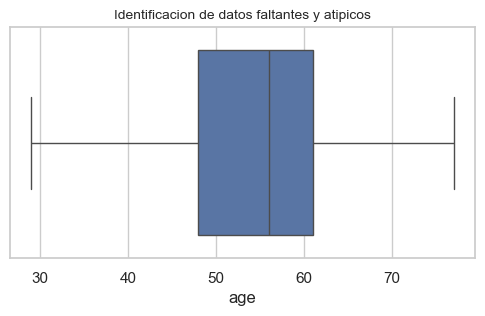

In [118]:
#Identificacion de datos faltantes y atipicos 
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['age'])
plt.title('Identificacion de datos faltantes y atipicos',fontsize=10 )


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

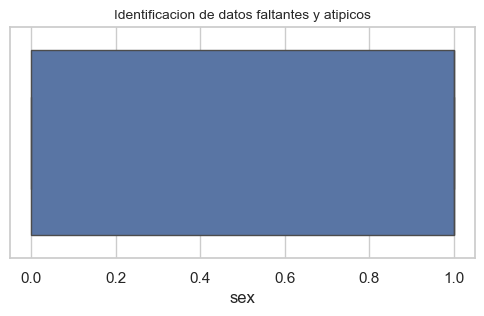

In [38]:
#Identificacion de datos faltantes y atipicos 
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['sex'])
plt.title('Identificacion de datos faltantes y atipicos',fontsize=10 )


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

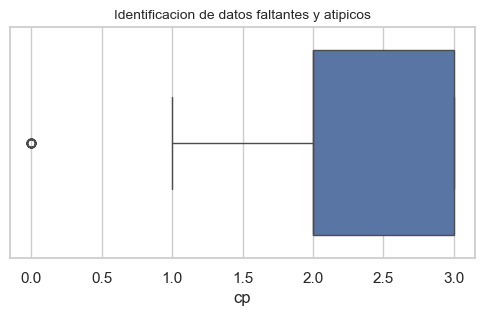

In [39]:
#Identificacion de datos faltantes y atipicos 
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['cp'])
plt.title('Identificacion de datos faltantes y atipicos',fontsize=10 )


Text(0.5, 1.0, 'Identificacion de datos faltantes y atipicos')

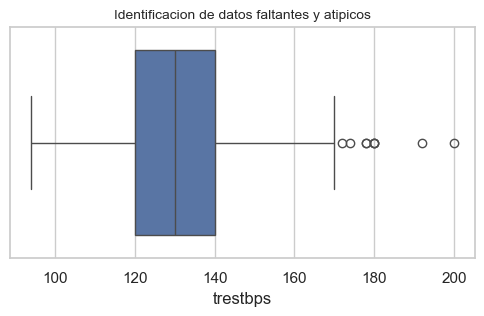

In [46]:
#Identificacion de datos faltantes y atipicos 
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['trestbps'])
plt.title('Identificacion de datos faltantes y atipicos',fontsize=10 )


<h1>Preprocesar los datos limpiándolos, tratando valores faltantes y 
transformándolos según sea necesario</h1>

In [60]:

#Revison de datos faltantes 
print("cantidad de registros con cero en age: ",df['age'].isin([0]).sum())
print("cantidad de registros con cero en sex: ",df['sex'].isin([0]).sum())
print("cantidad de registros con cero en trestbps: ",df['trestbps'].isin([0]).sum())
print("cantidad de registros con cero en chol: ",df['chol'].isin([0]).sum())
print("cantidad de registros con cero en thalach: ",df['thalach'].isin([0]).sum())


cantidad de registros con cero en age:  0
cantidad de registros con cero en sex:  96
cantidad de registros con cero en trestbps:  0
cantidad de registros con cero en chol:  0
cantidad de registros con cero en thalach:  0


In [57]:
#Remplazar todos los ceros con el valor medio (promedio) de la columna.
df['age']= df['age'].replace(0,df['age'].mean())
df['age']= df['trestbps'].replace(0,df['trestbps'].mean())
df['age']= df['chol'].replace(0,df['chol'].mean())
df['age']= df['thalach'].replace(0,df['thalach'].mean())


In [62]:
#Revision nuevamente de datos faltantes 
print("cantidad de registros con cero en age: ",df['age'].isin([0]).sum())
print("cantidad de registros con cero en trestbps: ",df['trestbps'].isin([0]).sum())
print("cantidad de registros con cero en chol: ",df['chol'].isin([0]).sum())
print("cantidad de registros con cero en thalach: ",df['thalach'].isin([0]).sum())


cantidad de registros con cero en age:  0
cantidad de registros con cero en trestbps:  0
cantidad de registros con cero en chol:  0
cantidad de registros con cero en thalach:  0


Text(0.5, 1.0, 'Identificacion de Datos Atipicos')

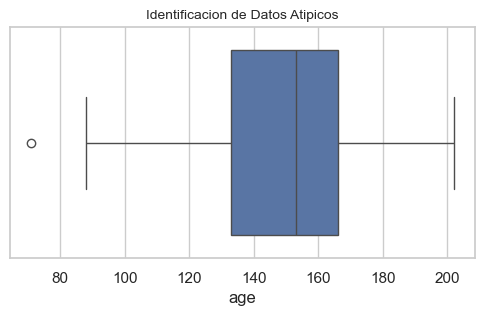

In [64]:
#Identificacion de datos atipicos 
plt.figure(figsize=(6,3))
sns.boxplot(x=df['age'])
plt.title('Identificacion de Datos Atipicos',fontsize=10)


In [68]:
#Conteo de Datos Atipicos 
nivel_minimo=20
nivel_maximo=200
Total_Atipicos=((df['age']<nivel_minimo)|(df['age']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_Atipicos))

El total de datos atipicos es 1


In [80]:
#Filtro datos atipicos
df=df[(df['age']<nivel_maximo)&(df['age']>nivel_minimo)]

In [84]:
#validar si se removieron los datos atipicos 
Total_atipicos=((df['age']<nivel_minimo)|(df['age']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(Total_atipicos))

El total de datos atipicos es 0


In [85]:
#Revison del tipo de datos y datos faltantes
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        296 non-null    int64  
 1   sex        296 non-null    int64  
 2   cp         296 non-null    int64  
 3   trestbps   296 non-null    int64  
 4   chol       296 non-null    int64  
 5   fbs        296 non-null    int64  
 6   restecg    296 non-null    int64  
 7   thalach    296 non-null    int64  
 8   exang      296 non-null    int64  
 9   oldpeak    296 non-null    float64
 10  slope      296 non-null    int64  
 11  ca         296 non-null    int64  
 12  thal       296 non-null    int64  
 13  condition  296 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 34.7 KB


<h1>Seleccionar las características más relevantes para entrenar el 
modelo utilizando selección de características</h1>


In [129]:
# Columna de interés para la predicción: 'condition'
# 0 = No tiene enfermedad cardíaca, 1 = Sí tiene enfermedad cardíaca
print(df['condition'].value_counts())  # Ver la distribución de los valores en la columna 'condition'



condition
0    160
1    137
Name: count, dtype: int64


In [130]:
df[['condition']].head(30)

,condition
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,1
8,0
9,0


<h1>Dividir el dataset en Train y Test para evaluar correctamente el modelo</h1>

In [152]:
 from sklearn.model_selection import train_test_split

# Crear las variables X y Y para almacenar las características y la variable objetivo
X = df.drop('condition', axis=1)  # 'X' contiene todas las características menos la columna 'condition'
Y = df['condition']  # 'Y' contiene la variable objetivo (0 = No enfermedad, 1 = Sí enfermedad)

# Dividir el dataset en conjuntos de entrenamiento (Train) y prueba (Test)
# El 75% de los datos se utilizará para entrenar el modelo y el 25% para evaluar el rendimiento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

# Verificar las dimensiones de los conjuntos divididos
print(f'Tamaño de X_train (entrenamiento): {X_train.shape}')
print(f'Tamaño de X_test (prueba): {X_test.shape}')
print(f'Tamaño de Y_train (entrenamiento): {Y_train.shape}')
print(f'Tamaño de Y_test (prueba): {Y_test.shape}')


Tamaño de X_train (entrenamiento): (222, 13)
Tamaño de X_test (prueba): (75, 13)
Tamaño de Y_train (entrenamiento): (222,)
Tamaño de Y_test (prueba): (75,)


 <h1>Entrenar el modelo configurando los diferentes 
hiperparámetros</h1>

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Construir el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")  # 'liblinear' es una libreria para resolver problemas lineales de clasificacion y regresion
modelo_regresion.fit (X_train , Y_train)
# crea el modelo de prediccion
prediccion = modelo_regresion.predict(X_test) # la funcion predict predice los valores a partir del conjunto de datos de validacion

# Entrenar el modelo con el conjunto de entrenamiento
modelo_regresion.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
prediccion = modelo_regresion.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(Y_test, prediccion))


# Imprimir la precisión del modelo
print("\nPrecisión del modelo:")
print(accuracy_score(Y_test, prediccion))


Matriz de Confusión:
[[36  4]
 [ 5 30]]

Precisión del modelo:
0.88


<h1>Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc</h1>

In [151]:
# desempeño del modelo de regresion
print(classification_report(Y_test, prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



<h1>Realizar las diferentes gráficas que permitan visualizar los 
resultados del modelo</h1>


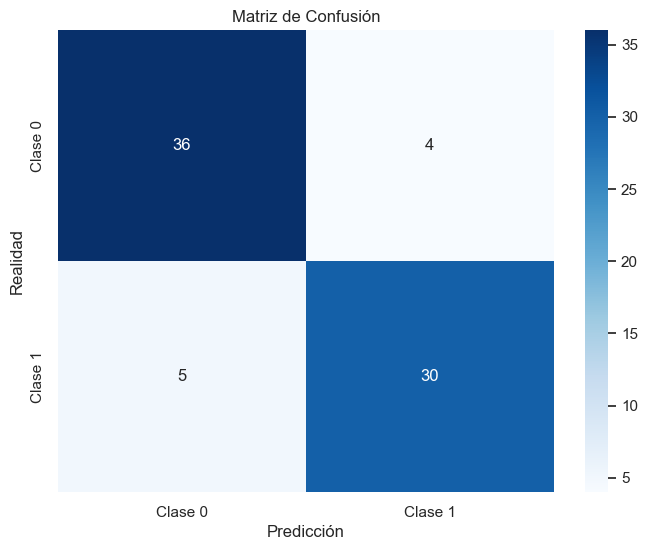

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, prediccion)

# Crear un heatmap para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


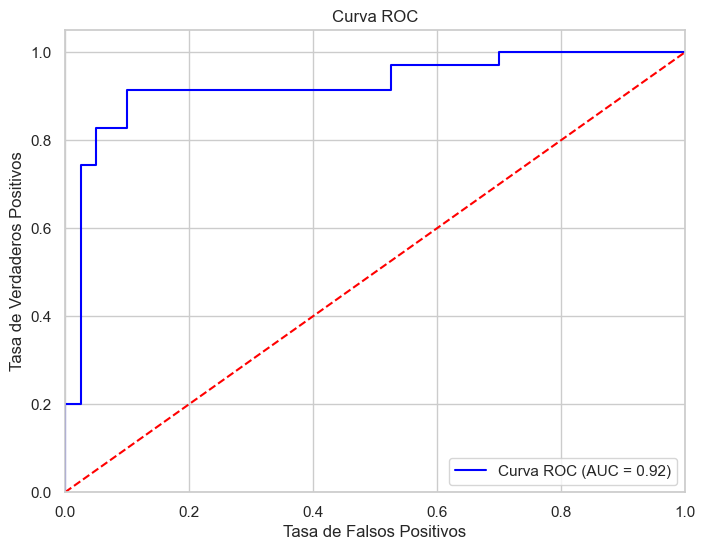

In [155]:
from sklearn.metrics import roc_curve, auc

# Calcular las probabilidades de predicción
y_prob = modelo_regresion.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(Y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_19160\928023335.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Característica', data=coef_df, palette='viridis')


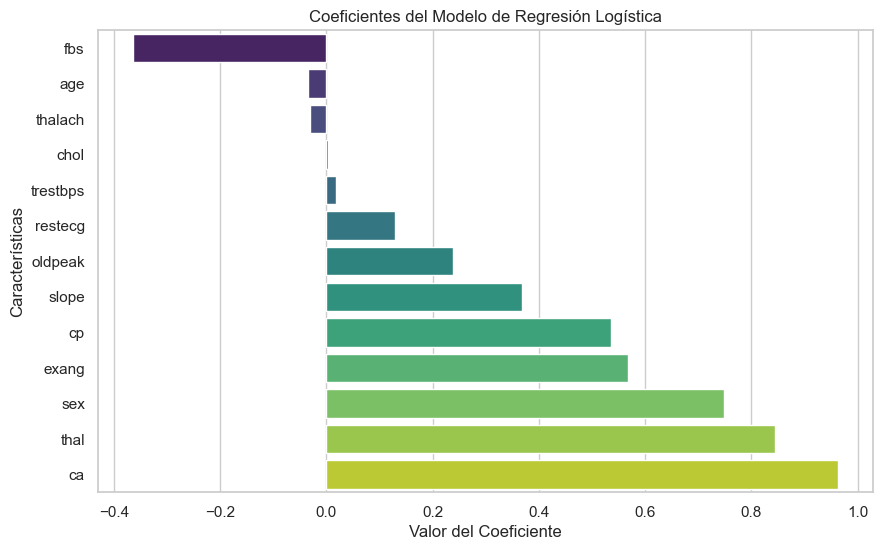

In [156]:
import numpy as np

# Obtener los coeficientes del modelo
coeficientes = modelo_regresion.coef_[0]
nombres = X_train.columns  # Si X_train es un DataFrame de pandas

# Crear un DataFrame para los coeficientes
coef_df = pd.DataFrame({'Característica': nombres, 'Coeficiente': coeficientes})
coef_df = coef_df.sort_values('Coeficiente')

# Graficar los coeficientes
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Característica', data=coef_df, palette='viridis')
plt.title('Coeficientes del Modelo de Regresión Logística')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Características')
plt.show()


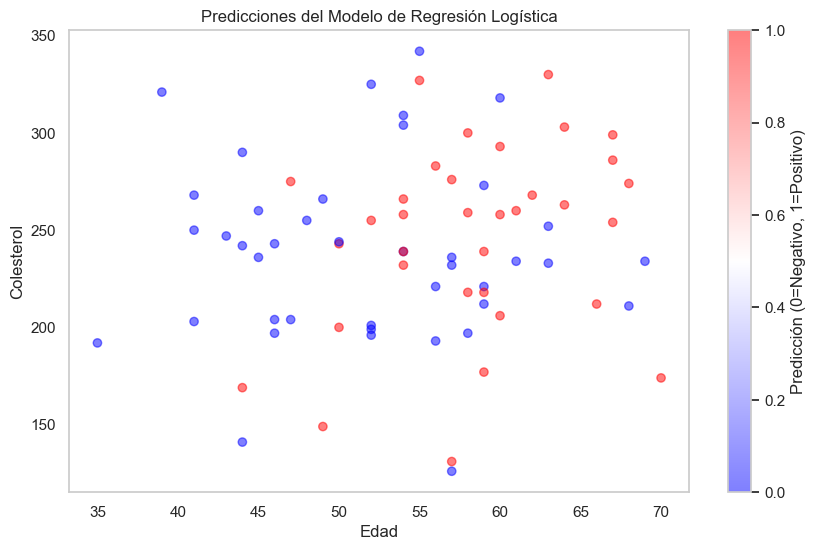

In [157]:
# Supongamos que deseas visualizar las predicciones en función de 'age' y 'chol'
plt.figure(figsize=(10, 6))
plt.scatter(X_test['age'], X_test['chol'], c=prediccion, cmap='bwr', alpha=0.5)
plt.colorbar(label='Predicción (0=Negativo, 1=Positivo)')
plt.xlabel('Edad')
plt.ylabel('Colesterol')
plt.title('Predicciones del Modelo de Regresión Logística')
plt.grid()
plt.show()


<h1> Interpretar, analizar y documentar los resultados obtenidos</h1>


Matriz de Confusión
Interpretación:

La matriz de confusión muestra el número de predicciones correctas e incorrectas del modelo.
Cada celda indica la cantidad de observaciones clasificadas en cada categoría (verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos).
Análisis:

Verdaderos Positivos (TP): Cantidad de instancias correctamente clasificadas como positivas.
Falsos Positivos (FP): Cantidad de instancias incorrectamente clasificadas como positivas (errores de tipo I).
Verdaderos Negativos (TN): Cantidad de instancias correctamente clasificadas como negativas.
Falsos Negativos (FN): Cantidad de instancias incorrectamente clasificadas como negativas (errores de tipo II).
Documentación:

Indica la tasa de aciertos y errores. Puedes calcular métricas como la precisión, el recall y el F1-score a partir de la matriz de confusión.
2. Curva ROC y AUC
Interpretación:

La curva ROC (Receiver Operating Characteristic) traza la tasa de verdaderos positivos frente a la tasa de falsos positivos a varios umbrales de clasificación.
El área bajo la curva (AUC) mide la capacidad del modelo para distinguir entre clases.
Análisis:

Un AUC cercano a 1 indica un excelente rendimiento del modelo, mientras que un AUC cercano a 0.5 sugiere que el modelo no es mejor que un clasificador aleatorio.
La forma de la curva indica el equilibrio entre sensibilidad y especificidad.
Documentación:

Incluye el valor del AUC y describe cómo el modelo se comporta a diferentes umbrales.
3. Gráfica de Coeficientes
Interpretación:

Los coeficientes del modelo indican el efecto de cada característica en la probabilidad de la clase positiva.
Un coeficiente positivo sugiere que a medida que aumenta la característica, también lo hace la probabilidad de que la instancia sea clasificada como positiva.
Análisis:

Identifica las características más influyentes. Por ejemplo, si el coeficiente de chol es muy alto, esto sugiere que los niveles de colesterol son un predictor significativo de la enfermedad cardíaca.
Observa si los coeficientes son coherentes con lo que se esperaría en el contexto médico.
Documentación:

Lista las características más importantes y sus coeficientes. Describe el impacto que tienen en la predicción.
4. Gráfico de Predicciones
Interpretación:

Este gráfico muestra cómo se distribuyen las predicciones del modelo en función de las características seleccionadas.
Análisis:

Observa si hay una separación clara entre las clases en el gráfico. Si los puntos se superponen mucho, puede indicar que el modelo tiene dificultades para diferenciar entre clases.
Explora posibles patrones o agrupaciones en los datos.
Documentación:

Comenta sobre la efectividad del modelo para clasificar correctamente las instancias en función de las características seleccionadas.
Conclusiones Generales
Rendimiento del Modelo: Resume el rendimiento general del modelo en términos de precisión, recall, F1-score y AUC.
Características Relevantes: Indica qué características fueron más importantes y cómo afectan las predicciones.
Recomendaciones: Proporciona recomendaciones sobre cómo mejorar el modelo, como el uso de técnicas de preprocesamiento, el ajuste de hiperparámetros o la exploración de modelos alternativos.
Aplicaciones Prácticas: Discute cómo los resultados pueden ser utilizados en el contexto de la salud pública, diagnóstico médico, o cualquier otro campo relevante.